# pythia-level-threshold

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from utils import utils, stats
from importlib import reload

In [11]:
data_path = '/u/cmolder/GitHub/Pythia/out/pythia_level/exp_spec06mini.csv'
weight_path = '/scratch/cluster/cmolder/traces/prefetcher_zoo/champsim/weights.txt'

# Add SPEC results.
df = utils.read_data_file(data_path)
weights = utils.read_weights_file(weight_path)
weights

,full_trace,weight,trace,simpoint
0,astar_163B,0.452174,astar,163B
1,astar_23B,0.162319,astar,23B
2,astar_313B,0.220290,astar,313B
3,bwaves_1609B,0.262524,bwaves,1609B
4,bwaves_1861B,0.337187,bwaves,1861B
...,...,...,...,...
184,streaming_phase1_core3,0.166667,streaming_core3,phase1
185,streaming_phase2_core3,0.166667,streaming_core3,phase2
186,streaming_phase3_core3,0.166667,streaming_core3,phase3
187,streaming_phase4_core3,0.166666,streaming_core3,phase4


In [12]:
#pd.set_option('display.max_rows', 100)
df[(df.trace == 'astar') & (df.pythia_level_threshold == -5.0)]

,full_trace,trace,simpoint,L1D_pref,L1D_accuracy,L1D_coverage,L1D_mpki,L1D_mpki_reduction,L2C_pref,L2C_pref_degree,...,dram_bw_epochs,dram_bw_reduction,ipc,ipc_improvement,pythia_level_threshold,pythia_low_conf_prefetches,pythia_high_conf_prefetches,path,baseline_path,all_pref
4,astar_313B,astar,313B,no,100.0,-0.430069,54.732659,-0.430069,pythia,"(None,)",...,3437369,11.086460,0.11605,12.735574,-5.0,3946769,2054716,/scratch/cluster/cmolder/pythia_level/exp_spec...,/scratch/cluster/cmolder/pythia_level/exp_spec...,"(no, pythia, no)"
20,astar_163B,astar,163B,no,100.0,0.000874,3.430920,0.000874,pythia,"(None,)",...,750309,0.779683,0.56202,0.855989,-5.0,250168,242856,/scratch/cluster/cmolder/pythia_level/exp_spec...,/scratch/cluster/cmolder/pythia_level/exp_spec...,"(no, pythia, no)"
39,astar_23B,astar,23B,no,100.0,-0.023507,28.849080,-0.023507,pythia,"(None,)",...,1353466,7.873335,0.30418,9.005555,-5.0,3405611,56234,/scratch/cluster/cmolder/pythia_level/exp_spec...,/scratch/cluster/cmolder/pythia_level/exp_spec...,"(no, pythia, no)"


In [13]:
reload(utils)
reload(stats)
weighted_df = stats.get_weighted_statistics(df, weights) # Weighted by simpoint
#weighted_df

---
## Metrics of each static threshold
- How does each static threshold compare to regular Pythia, and no prefetcher?

In [14]:
def plot_threshold_metric(wdf, trace, metric, dpi=192):
    wdf = wdf[wdf.trace == trace]#[['pythia_level_threshold', metric]])
    wdf = wdf.sort_values('pythia_level_threshold')
    X, y = wdf.pythia_level_threshold.to_numpy(), wdf[metric].to_numpy()
    
    fig, ax = plt.subplots(dpi=dpi)
    
    
    ax.plot(np.arange(0, len(y)), y)
    
    ax.set_xticks(np.arange(0, len(y)))
    ax.set_xticklabels(['Regular' if x == float('-inf') else str(x) for x in X], rotation=45)
    ax.set_xlabel('Static level threshold')
    ax.set_ylabel(metric)
    #ax.set_ylim(ymin=0)
    
    plt.axhline(y=y[0], linewidth=0.75, ls='--', color='red') # Regular Pythia baseline
    #plt.axhline(y=0, linewidth=0.75, ls='--', color='black')  # No prefetcher baseline
    
    fig.suptitle(f'{trace} {metric}')
    plt.show()

## IPC improvement

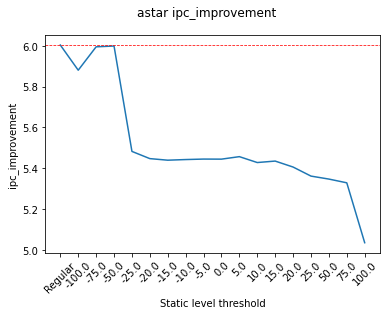

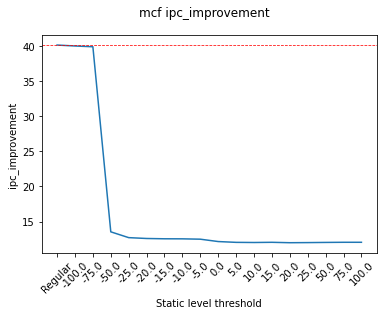

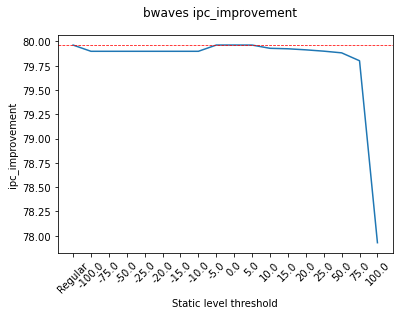

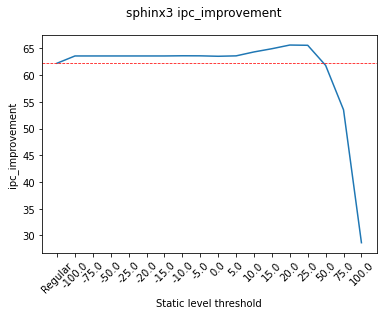

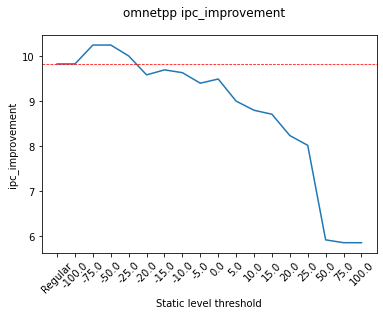

In [15]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'ipc_improvement', dpi=None)

## LLC MPKI reduction

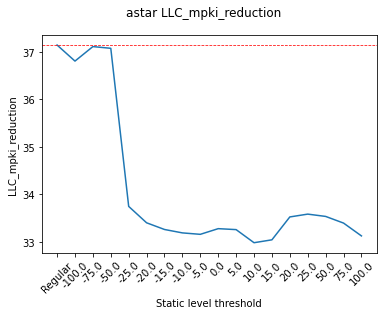

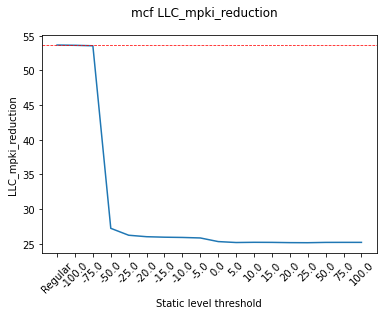

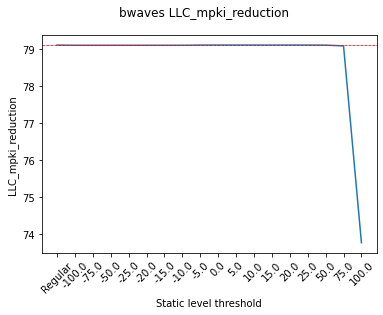

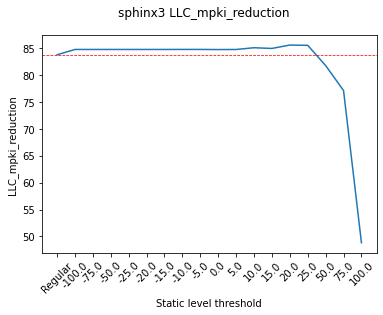

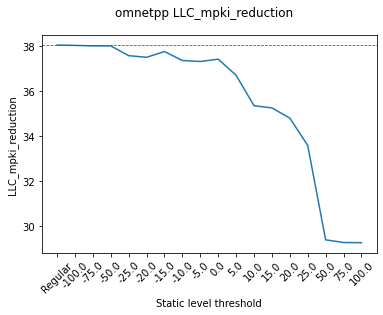

In [16]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'LLC_mpki_reduction', dpi=None)

## L2C MPKI reduction

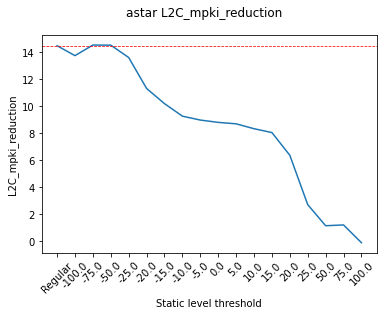

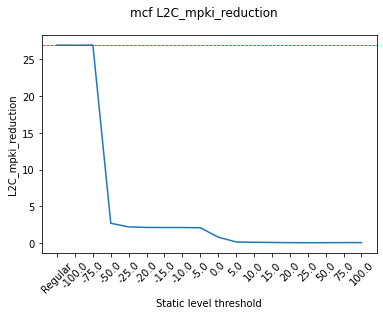

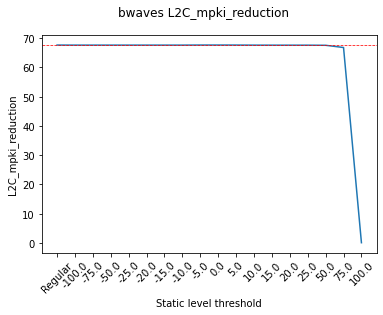

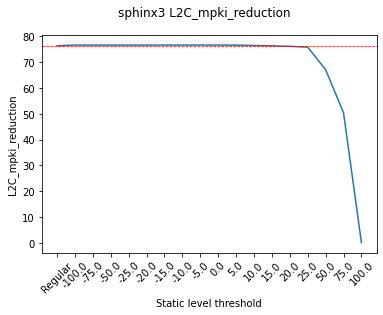

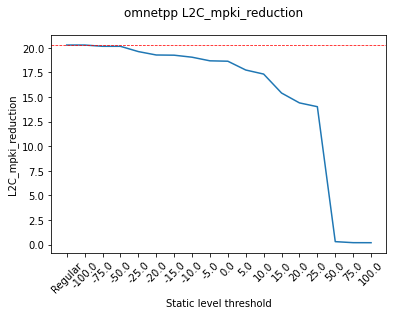

In [18]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'L2C_mpki_reduction', dpi=None)